<a href="https://colab.research.google.com/github/seeedata/BADA/blob/main/%ED%96%89%EC%82%AC%20%EC%B0%B8%EC%97%AC%20%EC%9D%B8%EC%9B%90%20%EC%98%88%EC%B8%A1%EC%9D%84%20%ED%86%B5%ED%95%9C%20%EC%95%88%EC%A0%84%20%EA%B4%80%EB%A6%AC%20%EC%BB%A8%EC%84%A4%ED%8C%85%20%EC%84%9C%EB%B9%84%EC%8A%A4/0717%20%EB%8F%84%EB%A1%9C%20%EA%B5%90%ED%86%B5%EB%9F%89%20data%20%EC%8B%9C%EA%B3%84%EC%97%B4%20%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

### 연습: 2018년 12월 데이터 분석

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/DAB/지점별 일자별 교통량/temp/2018년_지점별_일자별_교통량_올림픽공원.xlsx')

In [ ]:
for i in range(len(df.index)):
  for j in range(6,len(df.columns)):
    if pd.isna(df.iloc[i,j]):
      df.iloc[i,j] = df.iloc[:,6:].mean(skipna=True)[j-6]

In [ ]:
dfB8in = df[(df['지점번호']=='B-08')&(df['방향']=='유입')].reset_index()
dfB8out = df[(df['지점번호']=='B-08')&(df['방향']=='유출')].reset_index()
dfB9in = df[(df['지점번호']=='B-09')&(df['방향']=='유입')].reset_index()
dfB9out = df[(df['지점번호']=='B-09')&(df['방향']=='유출')].reset_index()
dfB10in = df[(df['지점번호']=='B-10')&(df['방향']=='유입')].reset_index()
dfB10out = df[(df['지점번호']=='B-10')&(df['방향']=='유출')].reset_index()
dfB12in = df[(df['지점번호']=='B-12')&(df['방향']=='유입')].reset_index()
dfB12out = df[(df['지점번호']=='B-12')&(df['방향']=='유출')].reset_index()
dfC18in = df[(df['지점번호']=='C-18')&(df['방향']=='유입')].reset_index()
dfC18out = df[(df['지점번호']=='C-18')&(df['방향']=='유출')].reset_index()
dfC19in = df[(df['지점번호']=='C-19')&(df['방향']=='유입')].reset_index()
dfC19out = df[(df['지점번호']=='C-19')&(df['방향']=='유출')].reset_index()
dfC20in = df[(df['지점번호']=='C-20')&(df['방향']=='유입')].reset_index()
dfC20out = df[(df['지점번호']=='C-20')&(df['방향']=='유출')].reset_index()

In [ ]:
dfin = dfB8in.iloc[:,7:]+dfB9in.iloc[:,7:]+dfB10in.iloc[:,7:]+dfB12in.iloc[:,7:]+dfC18out.iloc[:,7:]+dfC19out.iloc[:,7:]+dfC20out.iloc[:,7:]
dfout = dfB8out.iloc[:,7:]+dfB9out.iloc[:,7:]+dfB10out.iloc[:,7:]+dfB12out.iloc[:,7:]+dfC18in.iloc[:,7:]+dfC19in.iloc[:,7:]+dfC20in.iloc[:,7:]

In [ ]:
datain = []

for i in range(len(dfin.index)):
  for j in range(len(dfin.columns)):
    datain.append(dfin.iloc[i,j])

dataout = []

for i in range(len(dfout.index)):
  for j in range(len(dfout.columns)):
    dataout.append(dfout.iloc[i,j])

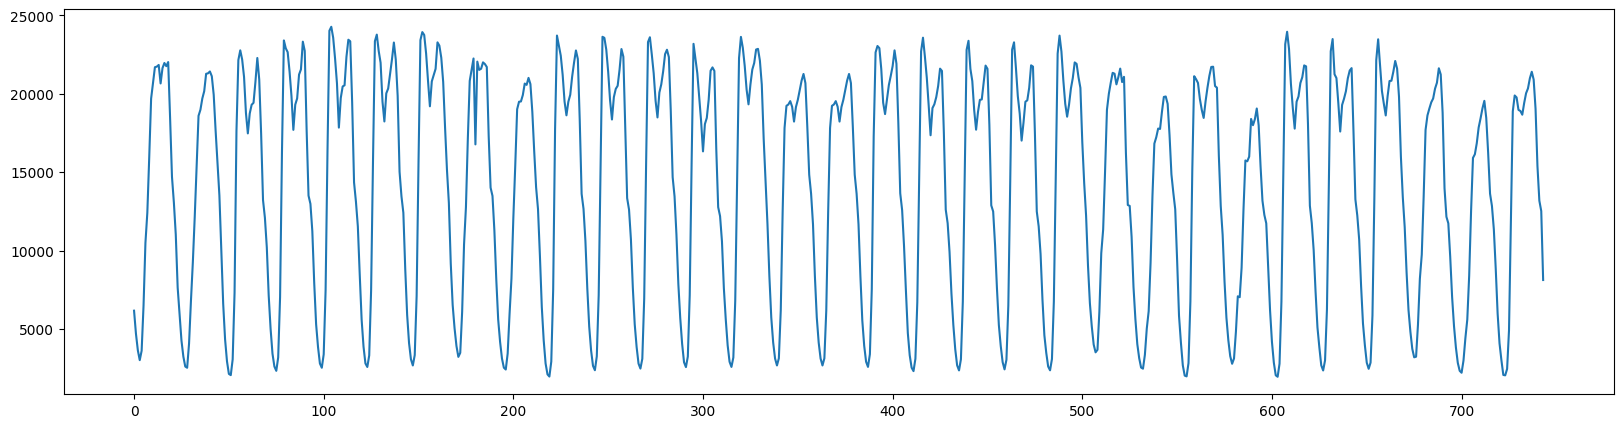

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(datain,linestyle='-')

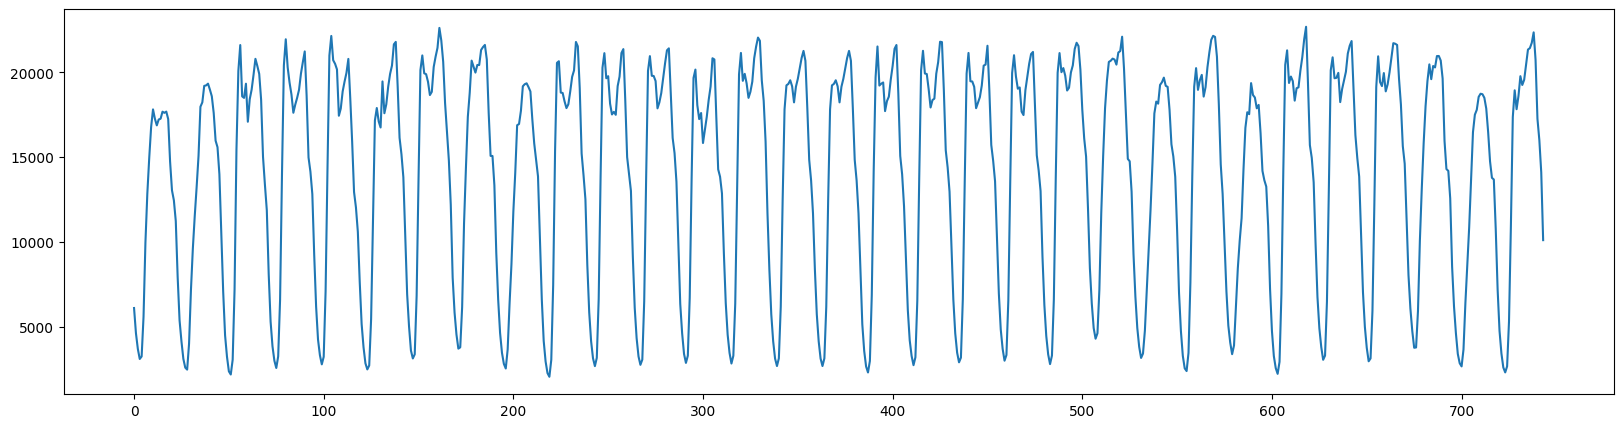

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(dataout,linestyle='-')

1. 하루동안 0시~24시까지 small-large-small의 규칙적인 패턴을 보임
2. large 부분에서 출퇴근 시간에는 더 교통량이 많고 그 사이에는 적은 larger-large-larger의 규칙적인 패턴을 보임
3. 주말과 공휴일에 비해서 평일의 large 부분의 높이가 더 높은 패턴을 보임

### 지점별 일자별 교통량 데이터 분석

In [ ]:
df_origin = pd.read_excel('/content/drive/MyDrive/DAB/지점별 일자별 교통량/지점별_일자별_교통량.xlsx')

In [ ]:
# 합병하면서 생긴 의미없는 열 제거

df = df_origin.iloc[:,:-4]

In [ ]:
# 결측치를 각 열의 평균으로 처리

for i in range(len(df.index)):
  for j in range(6,len(df.columns)):
    if pd.isna(df.iloc[i,j]):
      df.iloc[i,j] = df.iloc[:,6:].mean(skipna=True)[j-6]

뒤에서 그래프를 그리면서 알게 된 사실

1. 2019년 2월 데이터에서 방향과 구분 열 위치가 바껴 있다.
2. 2023년 2월 데이터의 일자가 2022년으로 되어 있다.

In [ ]:
# 2019년 2월 데이터에서 방향과 구분 열 위치 변경

df.loc[868:1259,['구분','방향']] = df.loc[868:1259,['방향','구분']].values

In [ ]:
# 각 지점과 유입/유출 여부로 구분

dfB8in = df[(df['지점번호']=='B-08')&(df['방향']=='유입')].reset_index()
dfB8out = df[(df['지점번호']=='B-08')&(df['방향']=='유출')].reset_index()
dfB9in = df[(df['지점번호']=='B-09')&(df['방향']=='유입')].reset_index()
dfB9out = df[(df['지점번호']=='B-09')&(df['방향']=='유출')].reset_index()
dfB10in = df[(df['지점번호']=='B-10')&(df['방향']=='유입')].reset_index()
dfB10out = df[(df['지점번호']=='B-10')&(df['방향']=='유출')].reset_index()
dfB12in = df[(df['지점번호']=='B-12')&(df['방향']=='유입')].reset_index()
dfB12out = df[(df['지점번호']=='B-12')&(df['방향']=='유출')].reset_index()
dfC18in = df[(df['지점번호']=='C-18')&(df['방향']=='유입')].reset_index()
dfC18out = df[(df['지점번호']=='C-18')&(df['방향']=='유출')].reset_index()
dfC19in = df[(df['지점번호']=='C-19')&(df['방향']=='유입')].reset_index()
dfC19out = df[(df['지점번호']=='C-19')&(df['방향']=='유출')].reset_index()
dfC20in = df[(df['지점번호']=='C-20')&(df['방향']=='유입')].reset_index()
dfC20out = df[(df['지점번호']=='C-20')&(df['방향']=='유출')].reset_index()

In [ ]:
# dfin: 올림픽공원 방면 교통량 / dfout: 올림픽공원 반대 방면 교통량

dfin = dfB8in.iloc[:,7:]+dfB9in.iloc[:,7:]+dfB10in.iloc[:,7:]+dfB12in.iloc[:,7:]+dfC18out.iloc[:,7:]+dfC19out.iloc[:,7:]+dfC20out.iloc[:,7:]
dfout = dfB8out.iloc[:,7:]+dfB9out.iloc[:,7:]+dfB10out.iloc[:,7:]+dfB12out.iloc[:,7:]+dfC18in.iloc[:,7:]+dfC19in.iloc[:,7:]+dfC20in.iloc[:,7:]

In [ ]:
# 시간별 교통량을 합한 하루 교통량 column 생성

dfin['합계'] = dfin.sum(axis=1)
dfout['합계'] = dfout.sum(axis=1)

In [ ]:
# 날짜 column 생성

dfin['일자'] = dfB8in.iloc[:,1]
dfout['일자'] = dfB8in.iloc[:,1]

In [ ]:
# 날짜 column의 변수 type을 string으로 정의

dfin['일자'] = dfin['일자'].astype(str)
dfout['일자'] = dfout['일자'].astype(str)

In [ ]:
# 날짜 column의 변수 type을 datetime으로 정의

dfin['일자'] = pd.to_datetime(dfin['일자'])
dfout['일자'] = pd.to_datetime(dfout['일자'])

In [ ]:
Feb2023 = pd.date_range(datetime.datetime(2023,2,1),datetime.datetime(2023,2,28),freq='D')
Feb2023

DatetimeIndex(['2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04',
               '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08',
               '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12',
               '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16',
               '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20',
               '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24',
               '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# 2023년 2월 데이터의 연도 2023년으로 변경

dfin.loc[1523:1550,'일자'] = Feb2023
dfout.loc[1523:1550,'일자'] = Feb2023

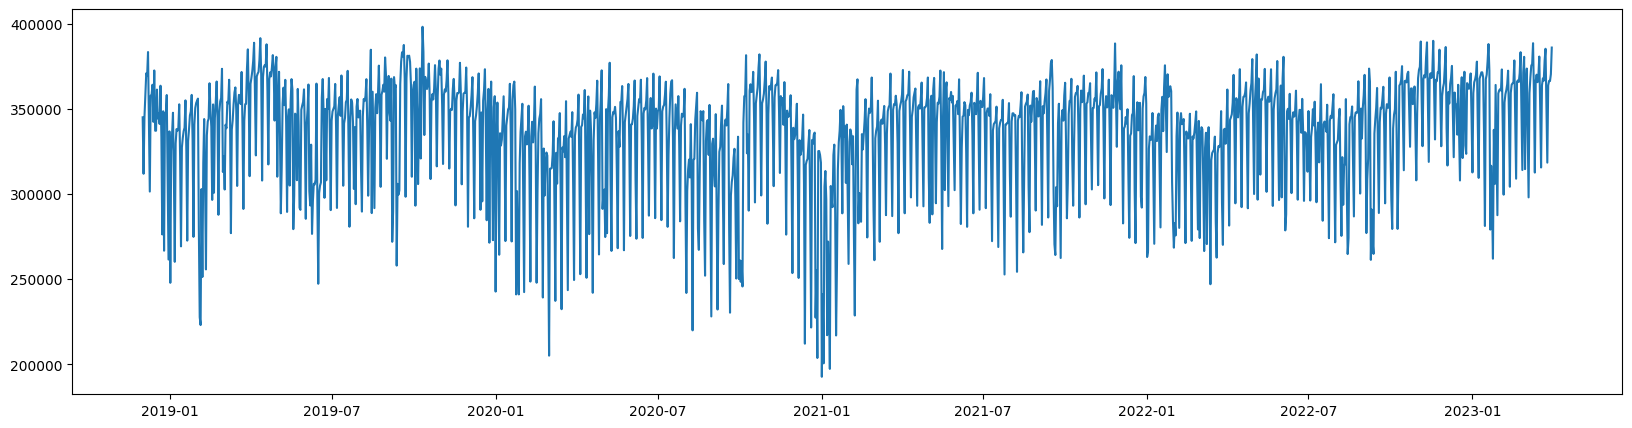

In [ ]:
# 올림픽공원 방면 교통량

plt.figure(figsize=(20,5))
plt.plot(dfin['일자'],dfin['합계'],linestyle='-')

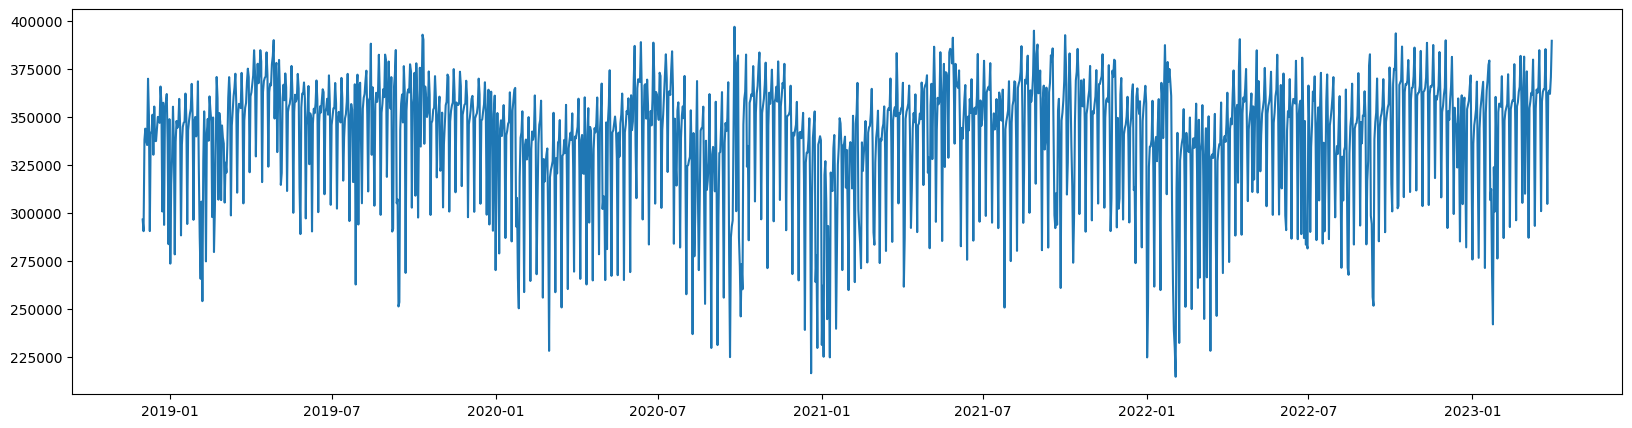

In [ ]:
# 올림픽공원 반대 방면 교통량

plt.figure(figsize=(20,5))
plt.plot(dfout['일자'],dfout['합계'],linestyle='-')

dfin: 올림픽공원 방면 지점들의 하루 도로 교통량 합계

dfout: 올림픽공원 반대 방면 지점들의 하루 도로 교통량 합계

그래프를 더 자세히 보기 위해 날짜를 일부만 떼어서 본 결과 월화수목에 비해 금요일에 교통량이 증가하고 토요일에 살짝 감소한 후 일요일에 많이 감소하는 패턴을 보인다. 또한 평일인데 공휴일인 경우에도 교통량이 현저히 줄어든다.

전체적인 추세는 드러나지만 출퇴근을 하는 평일과 그렇지 않은 주말의 교통량 차이가 보인다. --> 월화수목/금/토일로 나누어 분석

In [ ]:
dfin['요일'] = dfB8in.iloc[:,2]
dfout['요일'] = dfB8in.iloc[:,2]

In [ ]:
dfin.mtwt = dfin[dfin['요일'].isin(['월','화','수','목'])]
dfin.f = dfin[dfin['요일'].isin(['금'])]
dfin.ss = dfin[dfin['요일'].isin(['토','일'])]
dfout.mtwt = dfout[dfout['요일'].isin(['월','화','수','목'])]
dfout.f = dfout[dfout['요일'].isin(['금'])]
dfout.ss = dfout[dfout['요일'].isin(['토','일'])]

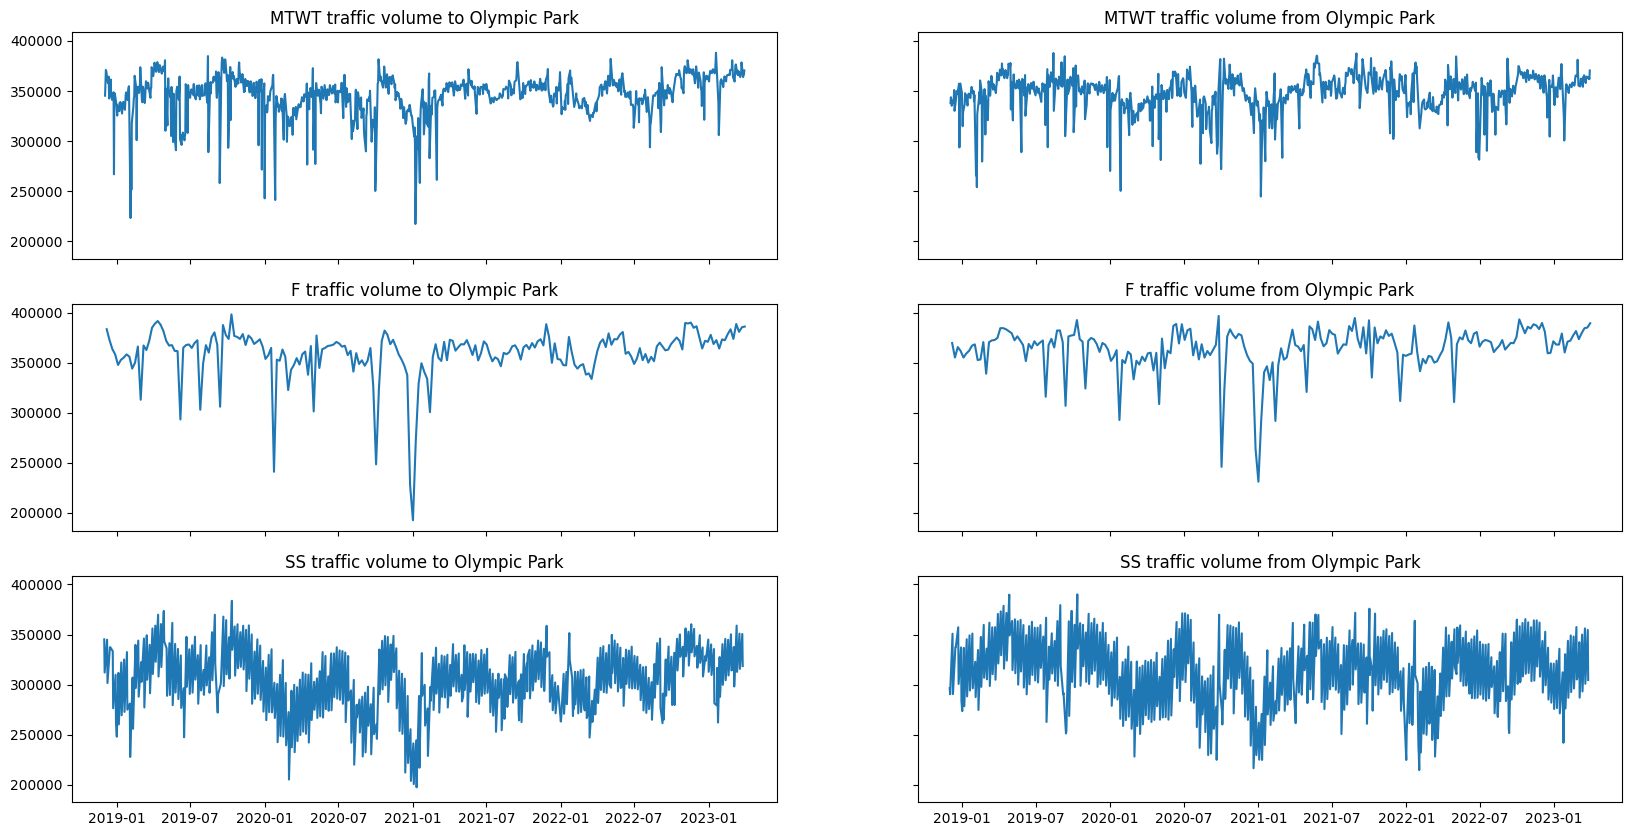

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(20, 10))

axes[0,0].plot(dfin.mtwt['일자'],dfin.mtwt['합계'])
axes[0,0].set_title('MTWT traffic volume to Olympic Park')
axes[1,0].plot(dfin.f['일자'],dfin.f['합계'])
axes[1,0].set_title('F traffic volume to Olympic Park')
axes[2,0].plot(dfin.ss['일자'],dfin.ss['합계'])
axes[2,0].set_title('SS traffic volume to Olympic Park')
axes[0,1].plot(dfout.mtwt['일자'],dfout.mtwt['합계'])
axes[0,1].set_title('MTWT traffic volume from Olympic Park')
axes[1,1].plot(dfout.f['일자'],dfout.f['합계'])
axes[1,1].set_title('F traffic volume from Olympic Park')
axes[2,1].plot(dfout.ss['일자'],dfout.ss['합계'])
axes[2,1].set_title('SS traffic volume from Olympic Park')

plt.show()

In [ ]:
# R의 change point library 이용을 위한 데이터프레임 저장

dfin.mtwt.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/mtwt_to.xlsx",index=False)
dfin.f.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/f_to.xlsx",index=False)
dfin.ss.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/ss_to.xlsx",index=False)
dfout.mtwt.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/mtwt_from.xlsx",index=False)
dfout.f.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/f_from.xlsx",index=False)
dfout.ss.to_excel("/content/drive/MyDrive/DAB/지점별 일자별 교통량/ss_from.xlsx",index=False)

2019년 10월 12일 토요일에 in과 out의 교통량이 공통적으로 max

키즈 러닝엔밀크-외부, 서울 트레킹-외부, 올림픽데이런-외부, 송파복지축제-외부, 전국장애인체육대회-내부, **슈퍼주니어 8번째 콘서트-내부**, W24 단독콘서트-내부

2019년 4월 27일 토요일에 in과 out의 교통량이 공통적으로 2번째 max

Jessie J Live In Seoul(실제 공연은 4/26)-내부, 이준기 아시아투어(실제 공연은 4/28)-내부, V CON(?)-내부, SK텔레콤국제그랑프리대회-내부, **트로이 시반 내한공연-내부**


행사를 쭉 살펴본 결과 중복값들이 존재

## ARIMA

In [ ]:
pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 24.5 MB/s eta 0:00:00


In [ ]:
import pandas_datareader.data as pdr
import warnings
import seaborn as sns
from datetime import datetime
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from pylab import rcParams
import statsmodels.api as sm
import itertools
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.arima.model import ARIMA as ARIMA
from pmdarima.arima import auto_arima
import pmdarima as pm
from pmdarima.arima import ndiffs
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet

In [ ]:
inss = dfin.ss.iloc[:,-3]
inss = pd.DataFrame(inss)
inss = inss.set_index(pd.to_datetime(dfin.ss.iloc[:,-2]))
inss.columns = ['traffic']
inss

,traffic
일자,
2018-12-01,345150.000000
2018-12-02,311977.675361
2018-12-08,344790.675361
2018-12-09,301529.675361
2018-12-15,337271.727530
...,...
2023-03-12,312682.350723
2023-03-18,350888.675361
2023-03-19,315667.596500


In [ ]:
outss = dfout.ss.iloc[:,-3]
outss = pd.DataFrame(outss)
outss = outss.set_index(pd.to_datetime(dfout.ss.iloc[:,-2]))
outss.columns = ['traffic']
outss

,traffic
일자,
2018-12-01,296414.350723
2018-12-02,290368.694259
2018-12-08,350824.675361
2018-12-09,290411.675361
2018-12-15,337271.727530
...,...
2023-03-12,293111.350723
2023-03-18,356086.675361
2023-03-19,300801.596500


토일 올림픽공원 방면 데이터에 대한 분석

In [ ]:
train_data, test_data = train_test_split(inss, test_size=0.2, shuffle=False)

In [ ]:
# Stationary Test: ADF
# H0: Non-stationary
# H1: Stationary

def adf_test(df):
  result = adfuller(df, autolag = 'AIC')
  print('ADF Statistic: {}'.format(round(result[0], 3)))
  print(40*'*')
  print('p-value:{}'.format(round(result[1], 5)))
  print(40*'*')
  for key, value in result[4].items():
    print('Critical Values:')
    print('{}:{}'.format(key, round(value, 3)))

adf_test(train_data['traffic'])

ADF Statistic: -3.742
****************************************
p-value:0.00356
****************************************
Critical Values:
1%:-3.448
Critical Values:
5%:-2.869
Critical Values:
10%:-2.571


In [ ]:
# Stationary Test: KPSS
# H0: Stationary
# H1: Non-stationary

from statsmodels.tsa.stattools import kpss
def kpss_test(series, **kw):
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    # Format Output
    print(f'KPSS Statistic: {statistic}')
    print(f'p-value: {p_value}')
    print(f'num lags: {n_lags}')
    print('Critcial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')

kpss_test(train_data)

KPSS Statistic: 0.39070204770679107
p-value: 0.08116291047121074
num lags: 9
Critcial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is stationary


두 검정 결과 데이터가 정상성을 나타낸다.

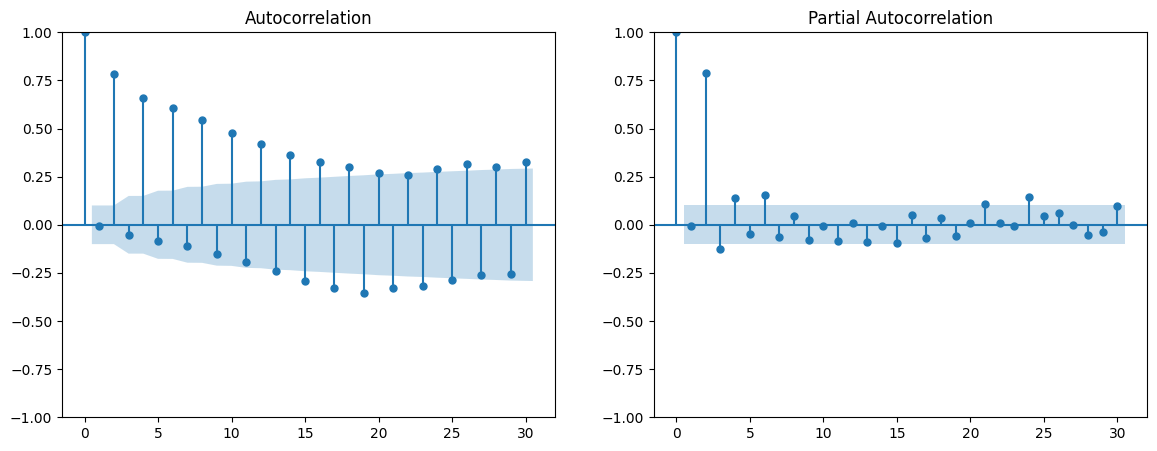

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sm.graphics.tsa.plot_acf(train_data.values.squeeze(),lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

In [ ]:
#Parameter search

p = range(0,3)
d = range(0,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(train_data, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(abs(round(model_fit.aic,2)))

ARIMA: (0, 0, 0) >> AIC : 10916.38
ARIMA: (0, 0, 1) >> AIC : 9034.17
ARIMA: (0, 0, 2) >> AIC : 8847.75
ARIMA: (0, 1, 0) >> AIC : 9271.54
ARIMA: (0, 1, 1) >> AIC : 9037.51
ARIMA: (0, 1, 2) >> AIC : 8996.98
ARIMA: (1, 0, 0) >> AIC : 9034.17
ARIMA: (1, 0, 1) >> AIC : 8922.74
ARIMA: (1, 0, 2) >> AIC : 8836.13
ARIMA: (1, 1, 0) >> AIC : 8807.94
ARIMA: (1, 1, 1) >> AIC : 8798.69
ARIMA: (1, 1, 2) >> AIC : 8772.91
ARIMA: (2, 0, 0) >> AIC : 8671.6
ARIMA: (2, 0, 1) >> AIC : 8664.45
ARIMA: (2, 0, 2) >> AIC : 8654.16
ARIMA: (2, 1, 0) >> AIC : 8805.48
ARIMA: (2, 1, 1) >> AIC : 8776.11
ARIMA: (2, 1, 2) >> AIC : 8775.32


In [ ]:
# Search optimal parameters

optimal = [(pdq[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 0, 2), 8654.16)]

In [ ]:
model_opt = ARIMA(train_data, order=optimal[0][0])
model_opt_fit = model_opt.fit()

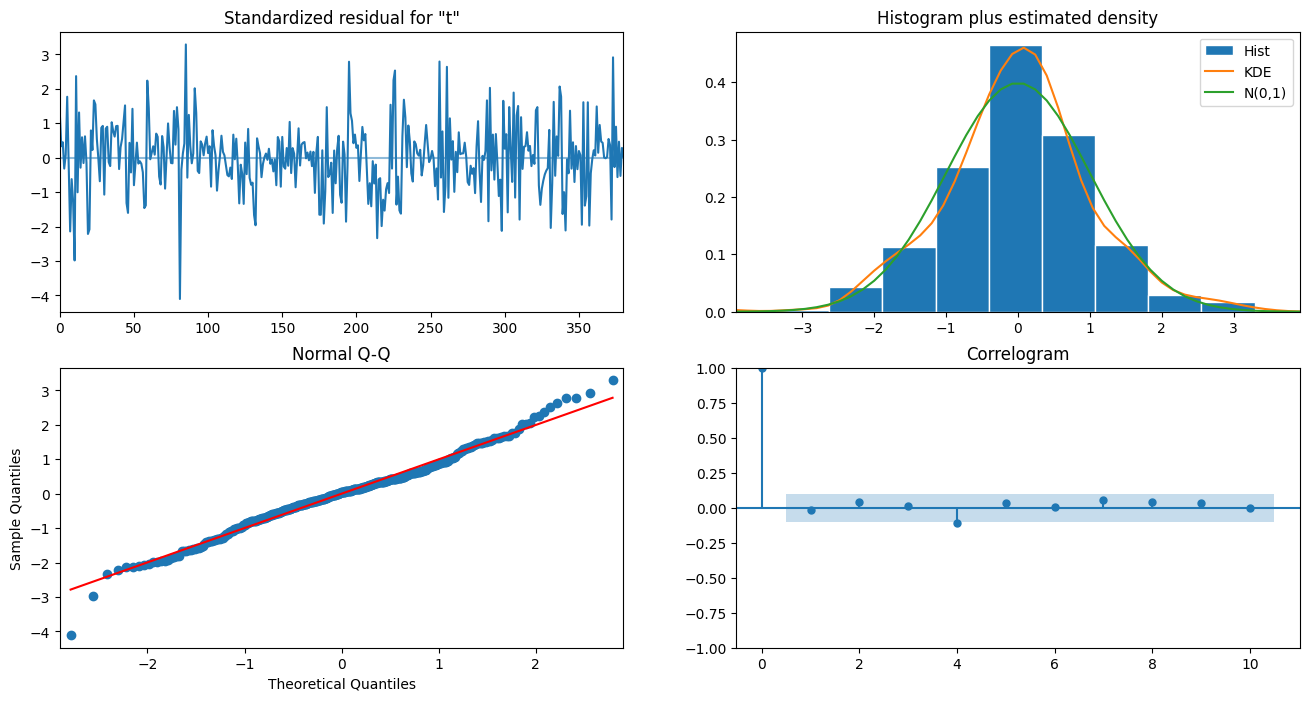

In [ ]:
model_opt_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
prediction_conf_int = prediction.conf_int()
prediction_conf_int

,lower traffic,upper traffic
381,291350.624478,371196.155460
382,254431.547225,335253.117748
383,280893.869168,374746.160627
384,246676.971384,340861.505503
385,273441.064828,376284.038474
...,...,...
472,233342.286425,365496.239819
473,235324.793381,367483.314469
474,233399.364868,365562.121755
475,235260.618001,367427.396772


In [ ]:
predicted_ub = prediction_conf_int.iloc[:,1]
predicted_lb = prediction_conf_int.iloc[:,0]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

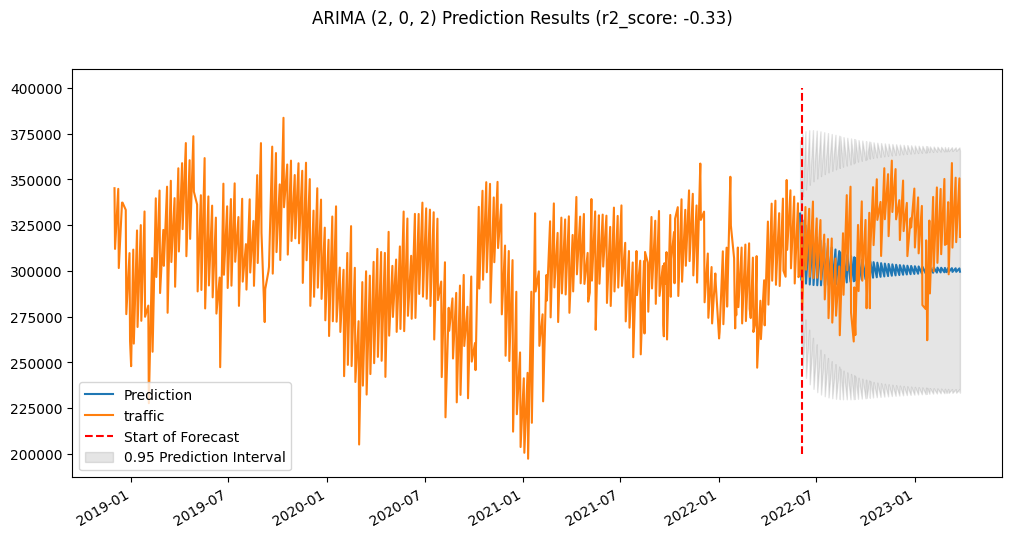

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(predict_index, predicted_value, label='Prediction')
inss.plot(ax=ax)
ax.set_xlabel('')
ax.vlines('2022-06-05', 200000, 400000, linestyle='--', color = 'r', label='Start of Forecast')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')
ax.legend(loc='lower left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2, 2)})')
plt.show()

토일 올림픽공원 반대 방면 데이터에 대한 분석

In [ ]:
train_data, test_data = train_test_split(outss, test_size=0.2, shuffle=False)

In [ ]:
adf_test(train_data['traffic'])

ADF Statistic: -3.907
****************************************
p-value:0.00198
****************************************
Critical Values:
1%:-3.448
Critical Values:
5%:-2.869
Critical Values:
10%:-2.571


In [ ]:
kpss_test(train_data)

KPSS Statistic: 0.6672215570050642
p-value: 0.01652531299953961
num lags: 8
Critcial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739
Result: The series is not stationary


두 검정 결과 ADF test는 데이터가 정상성을 나타낸다고 하지만 KPSS test는 데이터가 비정상성을 나타낸다고 말한다.

ADF test의 p-value 값이 더 작으므로 정상성을 나타낸다고 가정한다.

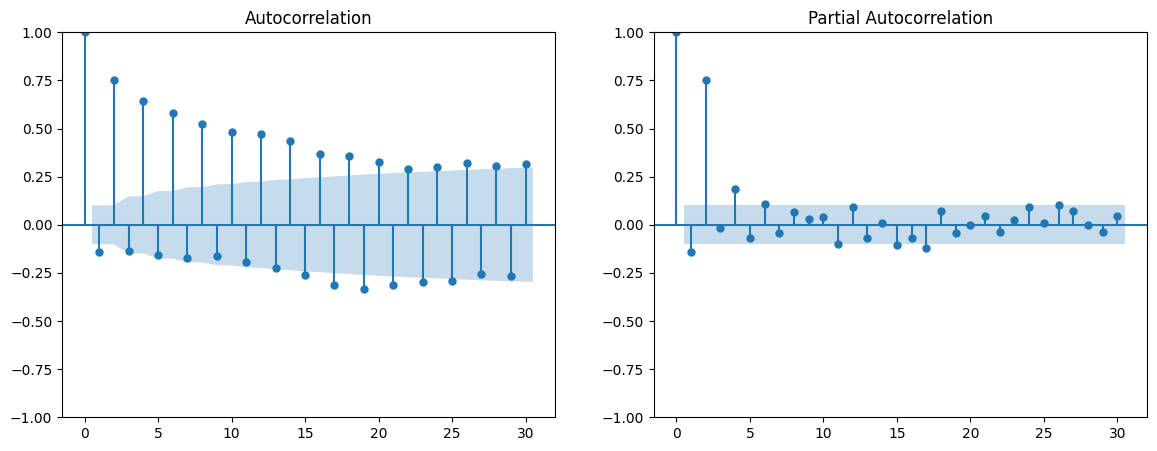

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(14,5))
sm.graphics.tsa.plot_acf(train_data.values.squeeze(),lags=30, ax=ax[0])
sm.graphics.tsa.plot_pacf(train_data.values.squeeze(), lags=30, ax=ax[1]);

In [ ]:
#Parameter search

p = range(0,3)
d = range(0,2)
q = range(0,3)
pdq = list(itertools.product(p,d,q))

aic = []
for i in pdq:
    model = ARIMA(train_data, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic,2)}')
    aic.append(abs(round(model_fit.aic,2)))

ARIMA: (0, 0, 0) >> AIC : 11002.54
ARIMA: (0, 0, 1) >> AIC : 9117.32
ARIMA: (0, 0, 2) >> AIC : 8959.89
ARIMA: (0, 1, 0) >> AIC : 9406.79
ARIMA: (0, 1, 1) >> AIC : 9151.22
ARIMA: (0, 1, 2) >> AIC : 9102.92
ARIMA: (1, 0, 0) >> AIC : 9112.72
ARIMA: (1, 0, 1) >> AIC : 8996.99
ARIMA: (1, 0, 2) >> AIC : 8935.76
ARIMA: (1, 1, 0) >> AIC : 8899.08
ARIMA: (1, 1, 1) >> AIC : 8901.63
ARIMA: (1, 1, 2) >> AIC : 8877.72
ARIMA: (2, 0, 0) >> AIC : 8804.77
ARIMA: (2, 0, 1) >> AIC : 8806.51
ARIMA: (2, 0, 2) >> AIC : 8790.2
ARIMA: (2, 1, 0) >> AIC : 8902.13
ARIMA: (2, 1, 1) >> AIC : 8878.79
ARIMA: (2, 1, 2) >> AIC : 8879.36


In [ ]:
# Search optimal parameters

optimal = [(pdq[i],j) for i, j in enumerate(aic) if j == min(aic)]
optimal

[((2, 0, 2), 8790.2)]

In [ ]:
model_opt = ARIMA(train_data, order=optimal[0][0])
model_opt_fit = model_opt.fit()

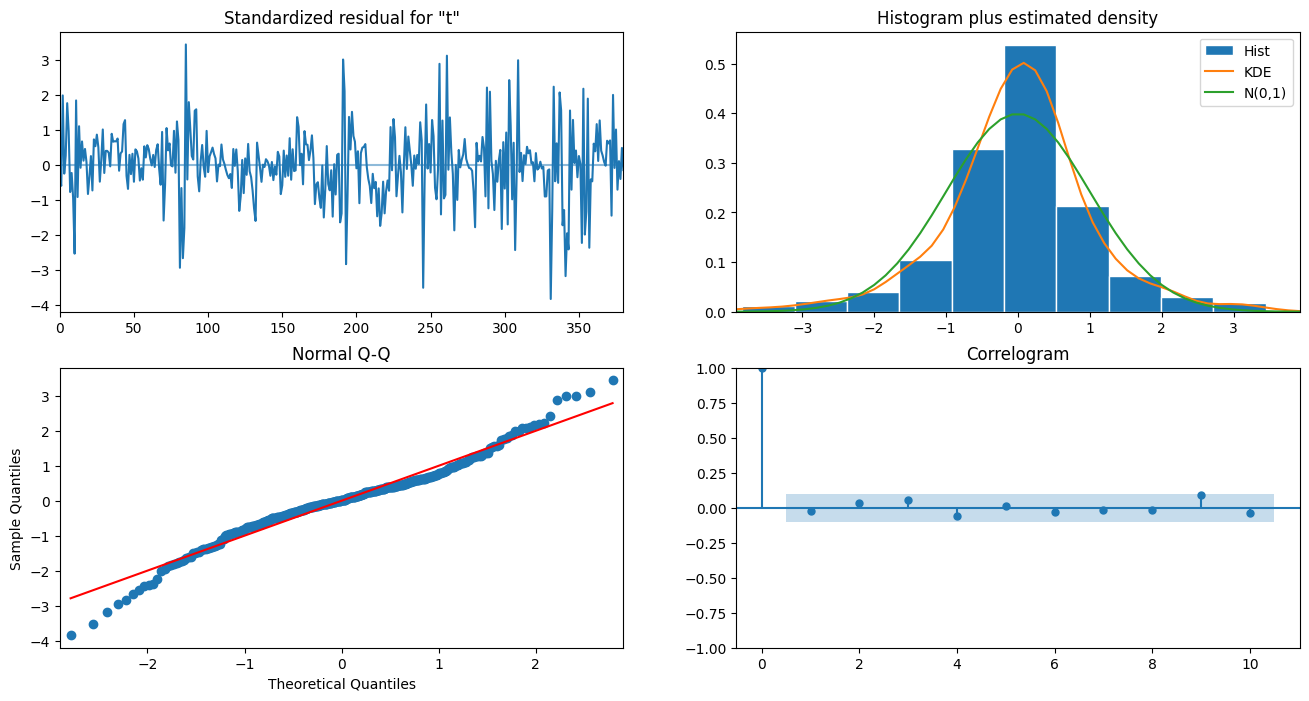

In [ ]:
model_opt_fit.plot_diagnostics(figsize=(16, 8))
plt.show()

In [ ]:
prediction = model_opt_fit.get_forecast(len(test_data))
predicted_value = prediction.predicted_mean
prediction_conf_int = prediction.conf_int()
prediction_conf_int

,lower traffic,upper traffic
381,296311.423750,391687.369394
382,252532.417185,347947.234194
383,286005.336161,394584.776247
384,245994.430860,354574.024073
385,278213.590193,395886.869446
...,...,...
472,236585.162459,383997.117457
473,237378.513526,384791.309124
474,236617.862533,384031.376678
475,237344.714804,384758.932290


In [ ]:
predicted_ub = prediction_conf_int.iloc[:,1]
predicted_lb = prediction_conf_int.iloc[:,0]
predict_index = list(test_data.index)
r2 = r2_score(test_data, predicted_value)

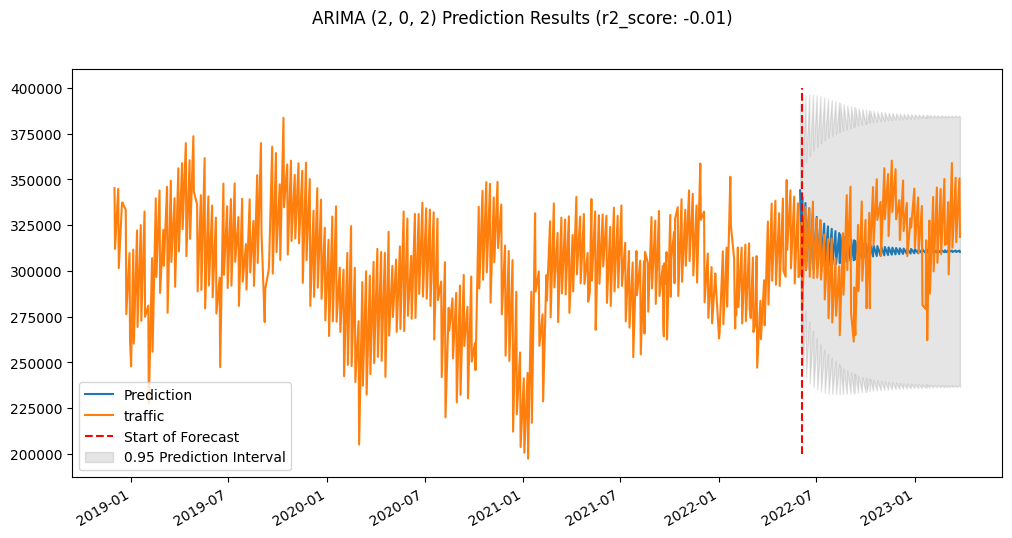

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(predict_index, predicted_value, label='Prediction')
inss.plot(ax=ax)
ax.set_xlabel('')
ax.vlines('2022-06-05', 200000, 400000, linestyle='--', color = 'r', label='Start of Forecast')
ax.fill_between(predict_index, predicted_lb, predicted_ub, color = 'k', alpha = 0.1, label = '0.95 Prediction Interval')
ax.legend(loc='lower left')
plt.suptitle(f'ARIMA {optimal[0][0]} Prediction Results (r2_score: {round(r2, 2)})')
plt.show()

## Prophet

In [ ]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [ ]:
IN = dfin.iloc[:,-3:-1].copy()
IN.columns = ['y','ds']
IN['ds'] = pd.to_datetime(IN['ds'])
IN

,y,ds
0,345150.000000,2018-12-01
1,311977.675361,2018-12-02
2,345288.675361,2018-12-03
3,358850.675361,2018-12-04
4,371026.730130,2018-12-05
...,...,...
1577,363923.062011,2023-03-27
1578,366587.625426,2023-03-28
1579,366439.433440,2023-03-29
1580,370504.619915,2023-03-30


In [ ]:
OUT = dfout.iloc[:,-3:-1].copy()
OUT.columns = ['y','ds']
OUT['ds'] = pd.to_datetime(OUT['ds'])
OUT

,y,ds
0,296414.350723,2018-12-01
1,290368.694259,2018-12-02
2,338005.675361,2018-12-03
3,343730.675361,2018-12-04
4,337409.618985,2018-12-05
...,...,...
1577,362361.675361,2023-03-27
1578,363510.671604,2023-03-28
1579,361841.675361,2023-03-29
1580,370465.675361,2023-03-30


올림픽공원 방면 데이터 분석

In [ ]:
train_data, test_data = train_test_split(IN,test_size=0.2, shuffle=False)
split_index = len(train_data)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/z3s9v12x.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/h7_k6jld.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=34972', 'data', 'file=/tmp/tmpalt1asw2/z3s9v12x.json', 'init=/tmp/tmpalt1asw2/h7_k6jld.json', 'output', 'file=/tmp/tmpalt1asw2/prophet_modelciq1v8oy/prophet_model-20230717133645.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:36:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:36:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


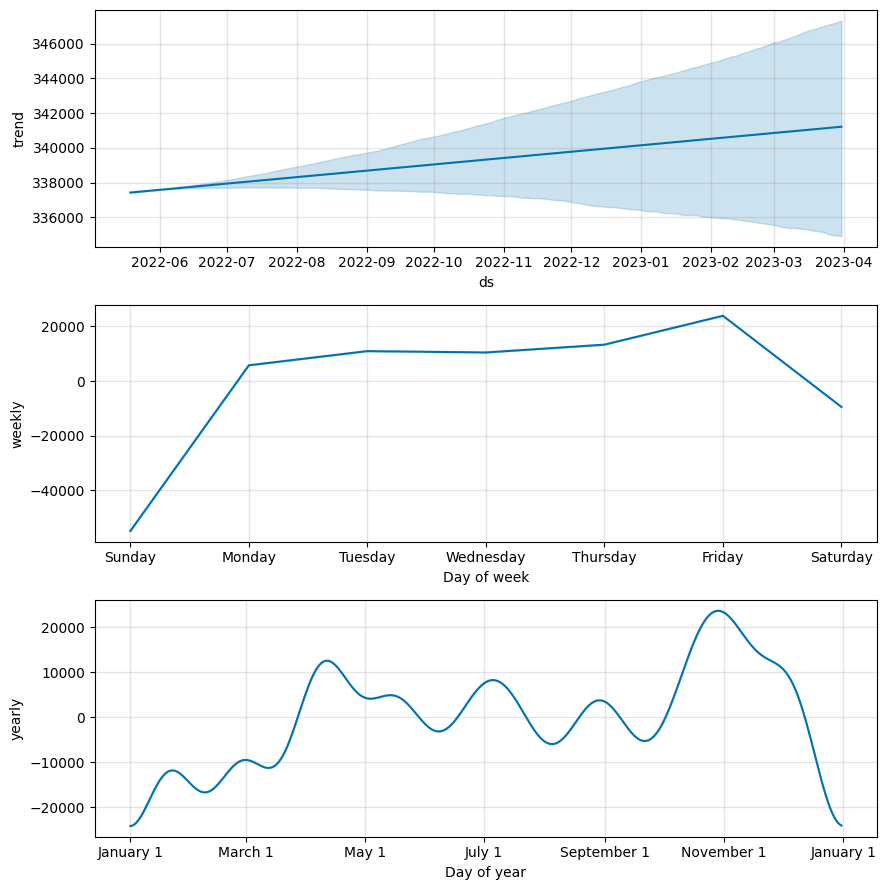

In [ ]:
model = Prophet()
model.fit(train_data)
forecast = model.predict(test_data)
model.plot_components(forecast)
plt.show()

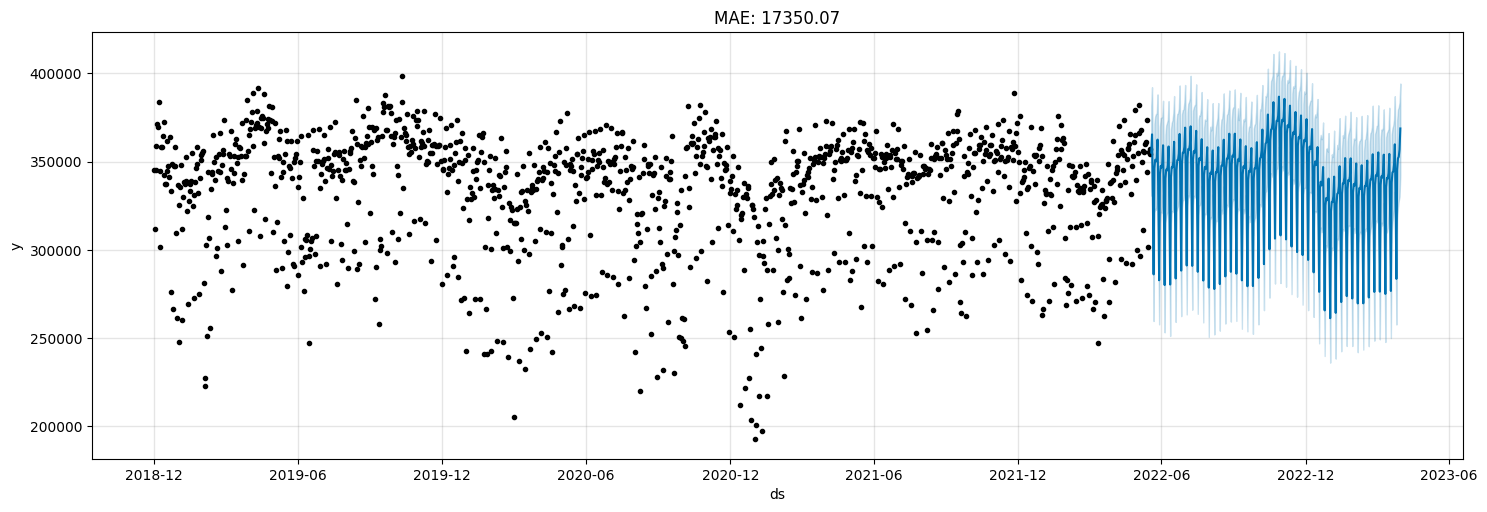

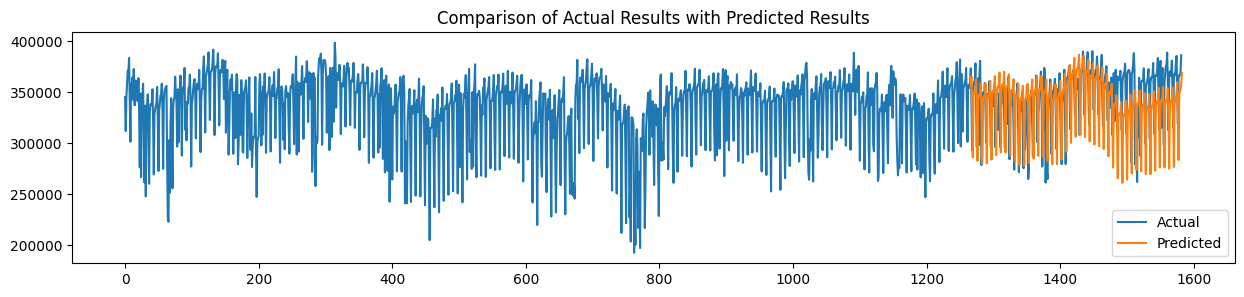

In [ ]:
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
model.plot(forecast, figsize=(15,5))
plt.title(f"MAE: {round(mae, 2)}")
plt.show()

forecast.index = forecast.index + split_index + 1
plt.figure(figsize=(15,3))
plt.plot(IN['y'], label='Actual')
plt.plot(forecast['yhat'], label='Predicted')
plt.legend()
plt.title('Comparison of Actual Results with Predicted Results')
plt.show()

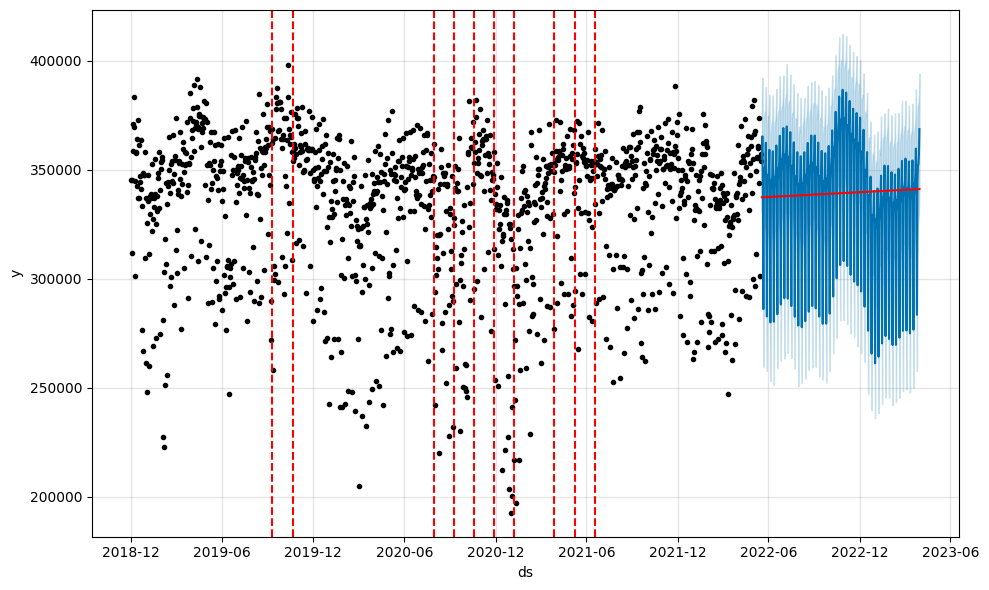

In [ ]:
from prophet.plot import add_changepoints_to_plot

fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/l6714lbo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/0mlfvait.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69898', 'data', 'file=/tmp/tmpalt1asw2/l6714lbo.json', 'init=/tmp/tmpalt1asw2/0mlfvait.json', 'output', 'file=/tmp/tmpalt1asw2/prophet_modelo9kkurry/prophet_model-20230717133724.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:37:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


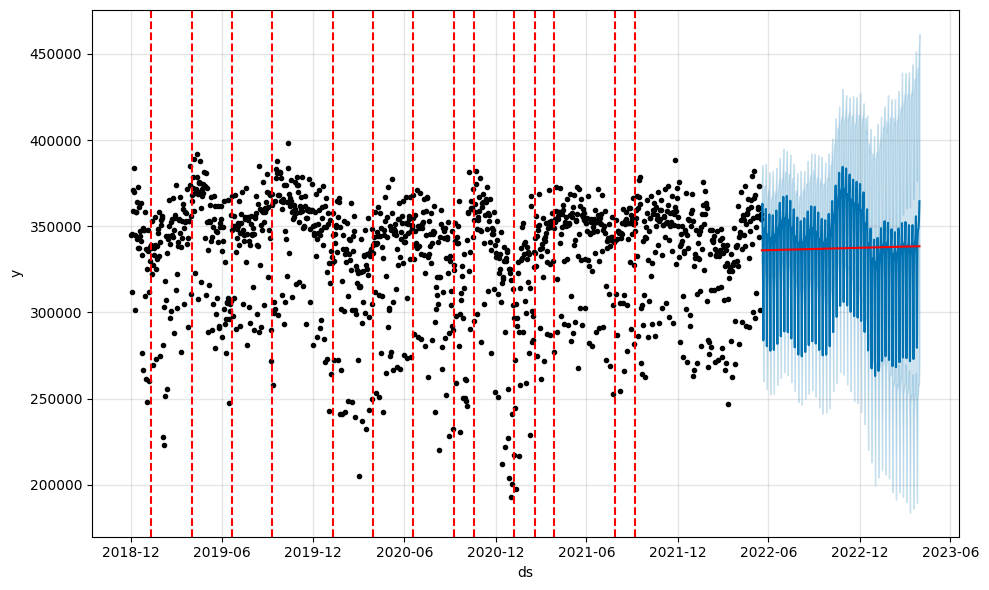

In [ ]:
# changepoint_prior_scale 증가

m = Prophet(changepoint_prior_scale=0.3)
m.fit(train_data)
forecast = m.predict(test_data)

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/1sy702d6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpalt1asw2/_g05l57g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=30848', 'data', 'file=/tmp/tmpalt1asw2/1sy702d6.json', 'init=/tmp/tmpalt1asw2/_g05l57g.json', 'output', 'file=/tmp/tmpalt1asw2/prophet_modelc_ps19qi/prophet_model-20230717133732.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:37:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:37:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


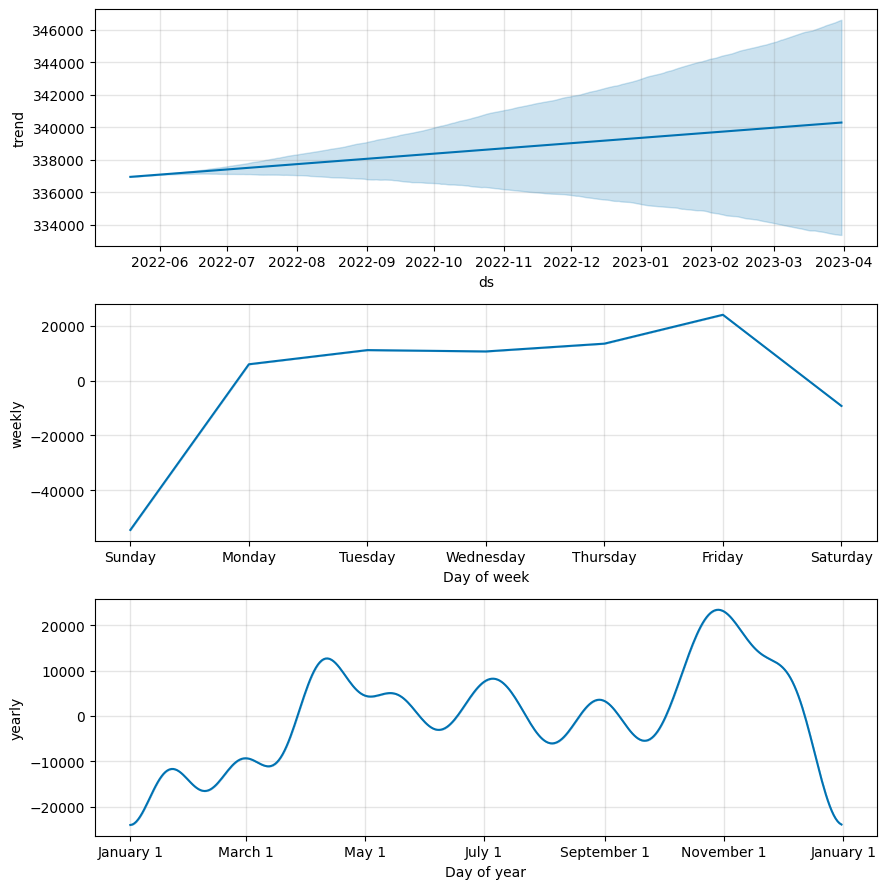

In [ ]:
# weekly_seasonality 설정

m = Prophet(weekly_seasonality=20)

m.fit(train_data)
forecast1 = m.predict(test_data)
fig = m.plot_components(forecast1)
plt.show()

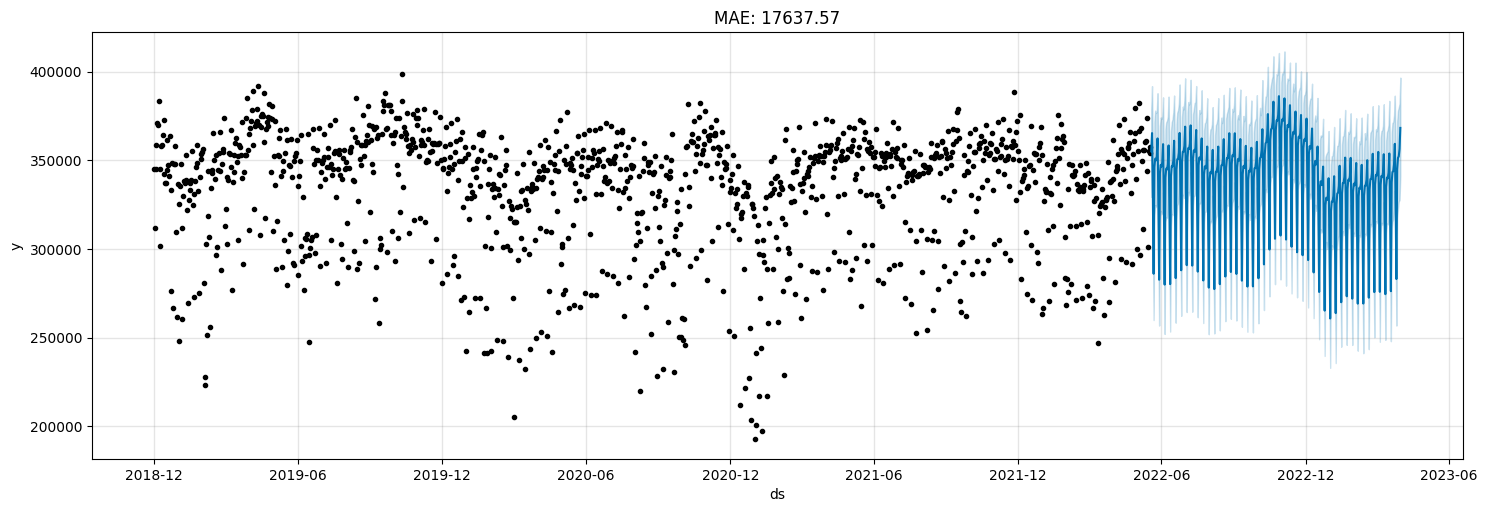

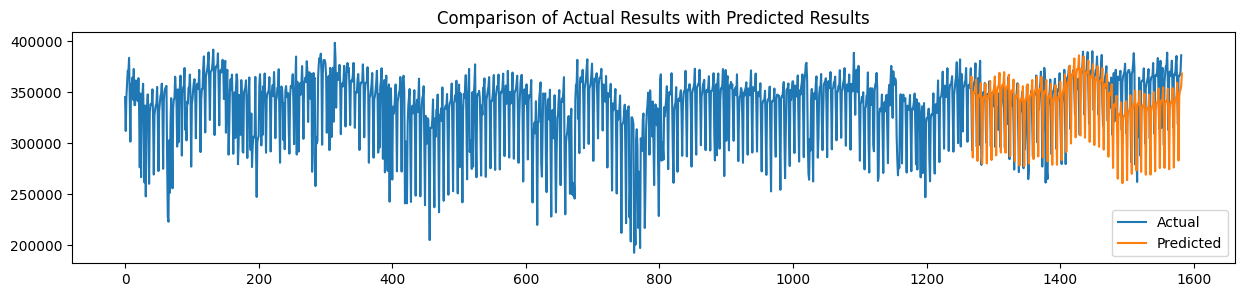

In [ ]:
mae = mean_absolute_error(test_data['y'], forecast['yhat'])
m.plot(forecast1, figsize=(15,5))
plt.title(f"MAE: {round(mae, 2)}")
plt.show()

forecast1.index = forecast1.index + split_index +1
plt.figure(figsize=(15,3))
plt.plot(IN['y'], label='Actual')
plt.plot(forecast1['yhat'], label='Predicted')
plt.legend()
plt.title('Comparison of Actual Results with Predicted Results')
plt.show()